### 파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.11/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.11/dist-packages']

In [2]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 36.2 MB/s eta 0:00:00


In [3]:
import numpy as np

In [4]:
import koreanize_matplotlib

In [5]:
import seaborn as sns

### 소셜미디어데이터 불러오기

In [18]:
import pandas as pd
df = pd.read_csv("/content/social_media_vs_productivity.csv")

### 데이터 전처리

In [19]:
# 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              


  0  'age': '나이',  
  1  'gender': '성별',  
  2  'job_type': '직업 유형',  
  3  'daily_social_media_time': '일일 소셜미디어 사용 시간',  
  4  'social_platform_preference': '선호하는 소셜 플랫폼',  
  5 'number_of_notifications': '알림 수',  
  6  'work_hours_per_day': '일일 근무 시간',  
  7  'perceived_productivity_score': '인지된 생산성 점수',  
  8  'actual_productivity_score': '실제 생산성 점수',  
  9  'stress_level': '스트레스 수준',  
  10 'sleep_hours': '수면 시간',  
  11  'screen_time_before_sleep': '취침 전 스크린 사용 시간',  
  12 'breaks_during_work': '근무 중 휴식 횟수',  
  13 'uses_focus_apps': '집중 앱 사용 여부',  
  14  'has_digital_wellbeing_enabled': '디지털 웰빙 활성화 여부',  
  15  'coffee_consumption_per_day': '일일 커피 섭취량',  
  16  'days_feeling_burnout_per_month': '월간 번아웃 느낌 일수',  
  17  'weekly_offline_hours': '주간 오프라인 시간',  
  18  'job_satisfaction_score': '직무 만족도 점수'  



In [20]:
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


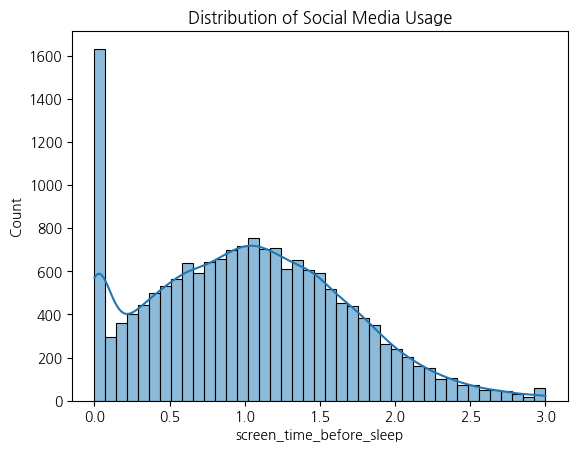

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 소셜 미디어 사용 시간 분포 확인
sns.histplot(data['screen_time_before_sleep'], kde=True)
plt.title('Distribution of Social Media Usage')
plt.show()



###결측치 확인 및 처리

In [22]:
data = df.dropna() #결측값 제거

# 데이터 분석

#### 전체 열별 상관관계 히트맵


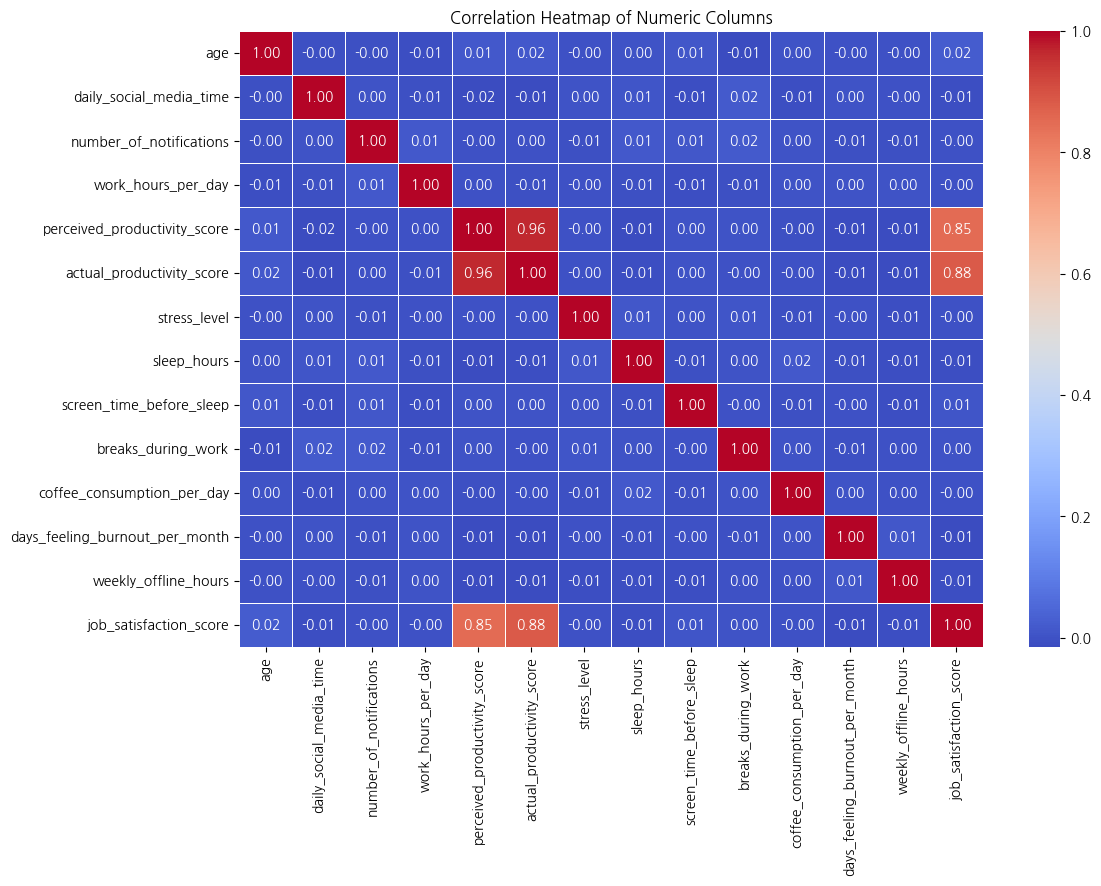

In [23]:
# 숫자형 열만 선택
numeric_columns =data.select_dtypes(include=['number'])
# 숫자형 열 간 상관관계 계산
correlation_matrix = numeric_columns.corr()
# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


#### 소셜미디어 사용 시간 별 스트레스 지수





<ipython-input-24-7154b98b839a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_range'] = pd.cut(data['daily_social_media_time'], bins=bins, labels=labels, right=False)
<ipython-input-24-7154b98b839a>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_valid.groupby('time_range')['stress_level'].mean().reset_index()


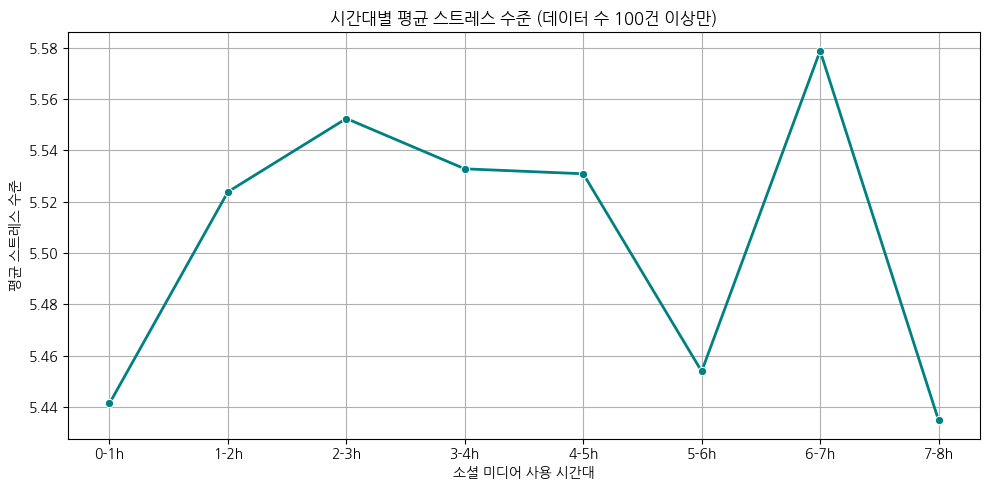

시간대별 데이터 수 (100건 이상만):
 time_range
3-4h    3294
2-3h    3141
0-1h    2725
4-5h    2641
1-2h    2539
5-6h    1531
6-7h     724
7-8h     292
Name: count, dtype: int64


In [24]:
# 시간대를 1시간 단위로 자르기
bins = np.arange(0, 10, 1)  # 0~9시간
labels = [f"{i}-{i+1}h" for i in bins[:-1]]
data['time_range'] = pd.cut(data['daily_social_media_time'], bins=bins, labels=labels, right=False)

# 각 시간대별 데이터 수 계산
counts = data['time_range'].value_counts()
valid_ranges = counts[counts >= 100].index.tolist()

# 유효한 시간대만 필터링
df_valid = data[data['time_range'].isin(valid_ranges)]

# 평균 스트레스 계산
grouped = df_valid.groupby('time_range')['stress_level'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped, x='time_range', y='stress_level', marker='o', linewidth=2, color='teal')
plt.title('시간대별 평균 스트레스 수준 (데이터 수 100건 이상만)')
plt.xlabel('소셜 미디어 사용 시간대')
plt.ylabel('평균 스트레스 수준')
plt.grid(True)
plt.tight_layout()
plt.show()

# 참고로 시간대별 데이터 수도 출력
print("시간대별 데이터 수 (100건 이상만):\n", counts[counts >= 100])

#### 직무별 소셜 미디어 사용 시간 분포

In [25]:
# 평균값을 소수점 2자리로 출력
print(df.groupby('job_type')['daily_social_media_time'].mean().round(2))

job_type
Education     3.10
Finance       3.08
Health        3.07
IT            3.13
Student       3.14
Unemployed    3.16
Name: daily_social_media_time, dtype: float64


(2.5, 3.5)

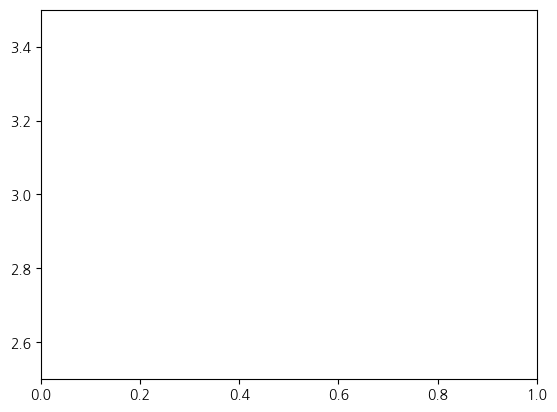

In [26]:
plt.ylim(2.5, 3.5)  # 예시로 소셜 미디어 사용 시간 범위를 좁힘

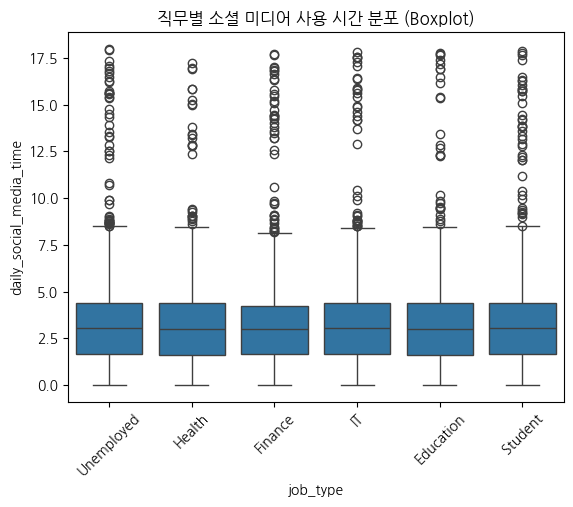

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='job_type', y='daily_social_media_time')
plt.xticks(rotation=45)
plt.title('직무별 소셜 미디어 사용 시간 분포 (Boxplot)')
plt.show()

#### SNS 사용 vs 생산성 변수 간 상관관계 (직무 평균 기준)

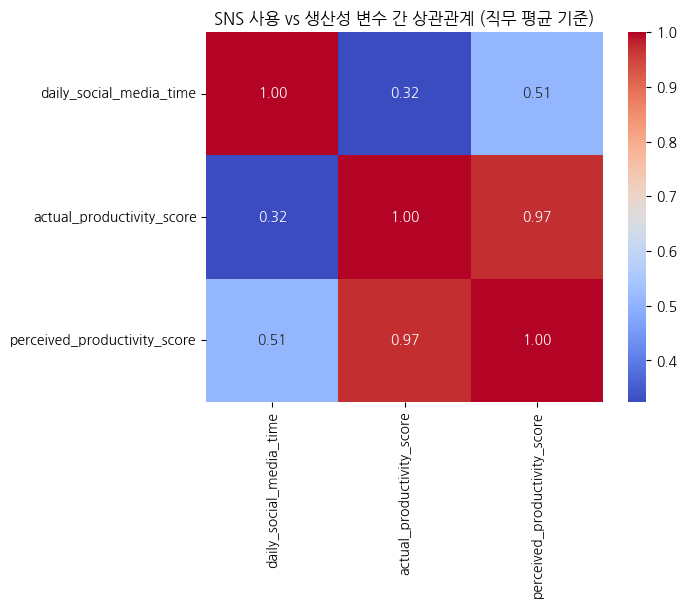

In [ ]:
# 상관관계 분석 (직무별 평균값 기준)
correlation = job_productivity.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("SNS 사용 vs 생산성 변수 간 상관관계 (직무 평균 기준)")
plt.show()

#### 수면과 생산성 사이의 관계

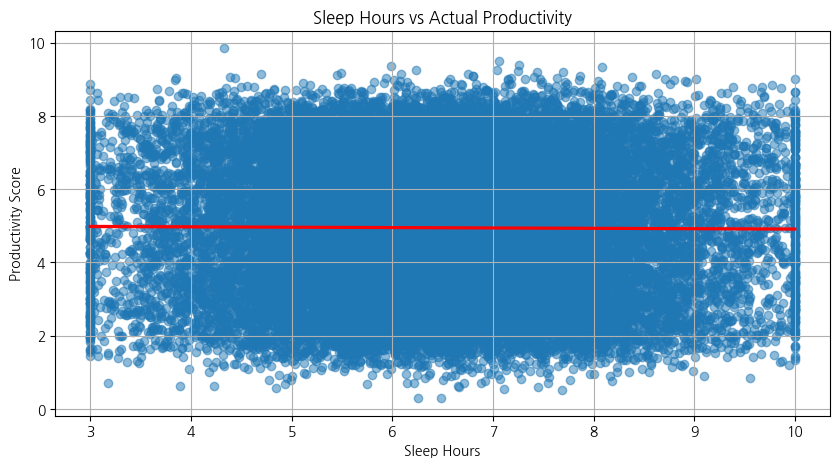

In [ ]:
df_sleep = df.dropna(subset=['sleep_hours', 'actual_productivity_score'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # 그래프 크기 설정
sns.regplot(
    x='sleep_hours',
    y='actual_productivity_score',
    data=df_sleep,
    scatter_kws={'alpha': 0.5},  # 점 투명도
    line_kws={'color': 'red'}    # 회귀선 색
)
plt.title('Sleep Hours vs Actual Productivity')  # 제목
plt.xlabel('Sleep Hours')                        # x축 이름
plt.ylabel('Productivity Score')                 # y축 이름
plt.grid(True)
plt.show()


#### 실제 생산성 vs 자가평가 생산성

Correlation between actual and perceived productivity scores:
                              actual_productivity_score  \
actual_productivity_score                      1.000000   
perceived_productivity_score                   0.964319   

                              perceived_productivity_score  
actual_productivity_score                         0.964319  
perceived_productivity_score                      1.000000  


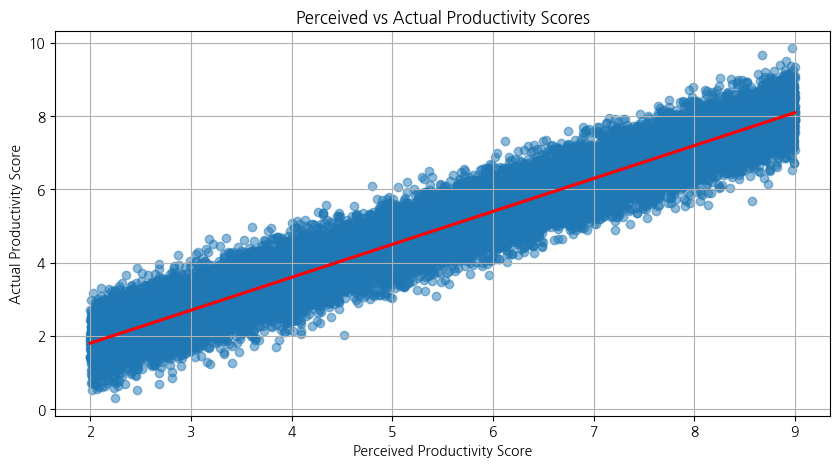

In [ ]:
# 1. 결측치 제거
df_prod = df.dropna(subset=['actual_productivity_score', 'perceived_productivity_score'])

# 2. 상관계수 계산
corr = df_prod[['actual_productivity_score', 'perceived_productivity_score']].corr()
print("Correlation between actual and perceived productivity scores:")
print(corr)

# 3. 산점도 + 회귀선 그리기
plt.figure(figsize=(10, 5))
sns.regplot(
    x='perceived_productivity_score',
    y='actual_productivity_score',
    data=df_prod,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Perceived vs Actual Productivity Scores')
plt.xlabel('Perceived Productivity Score')
plt.ylabel('Actual Productivity Score')
plt.grid(True)
plt.show()


#### 커피 vs 스트레스 및 번아웃

In [ ]:
# 기본 전처리
df2 = df[['coffee_consumption_per_day', 'stress_level', 'days_feeling_burnout_per_month']].dropna()
df3 = df[['weekly_offline_hours', 'job_satisfaction_score']].dropna()
df4 = df[['gender', 'age', 'daily_social_media_time', 'sleep_hours', 'actual_productivity_score']].dropna()

# 나이 그룹 구간 설정
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df4['age_group'] = pd.cut(df4['age'], bins=age_bins, labels=age_labels, right=False)

# 스타일 설정
sns.set(style="whitegrid")

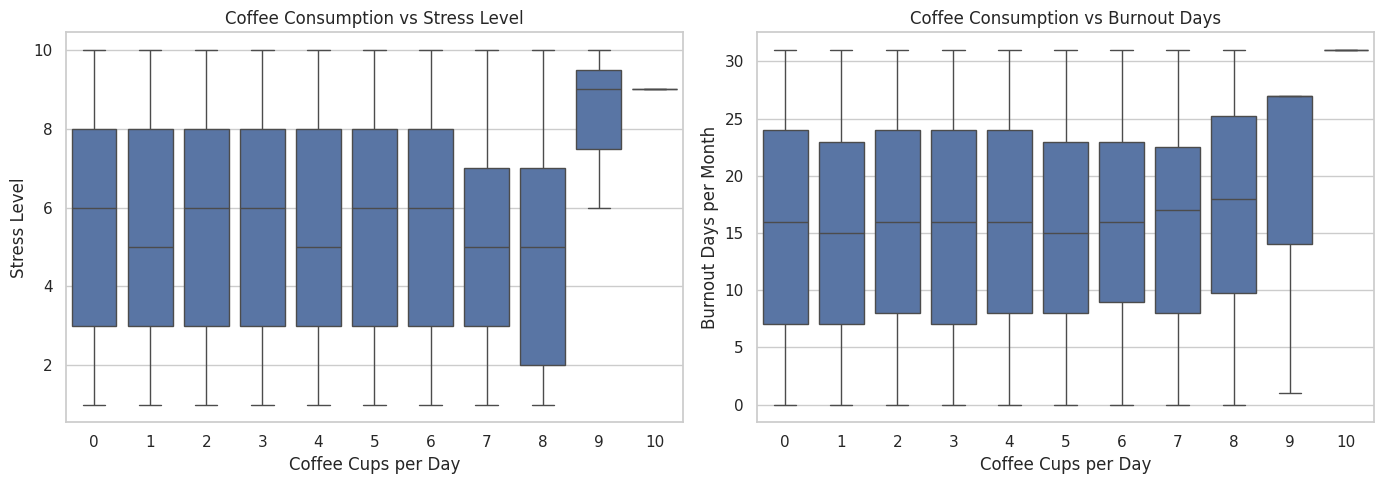

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df2, x='coffee_consumption_per_day', y='stress_level', ax=axes[0])
axes[0].set_title('Coffee Consumption vs Stress Level')
axes[0].set_xlabel('Coffee Cups per Day')
axes[0].set_ylabel('Stress Level')

sns.boxplot(data=df2, x='coffee_consumption_per_day', y='days_feeling_burnout_per_month', ax=axes[1])
axes[1].set_title('Coffee Consumption vs Burnout Days')
axes[1].set_xlabel('Coffee Cups per Day')
axes[1].set_ylabel('Burnout Days per Month')
plt.tight_layout()
plt.show()


#### 오프라인 시간 vs 직업 만족도

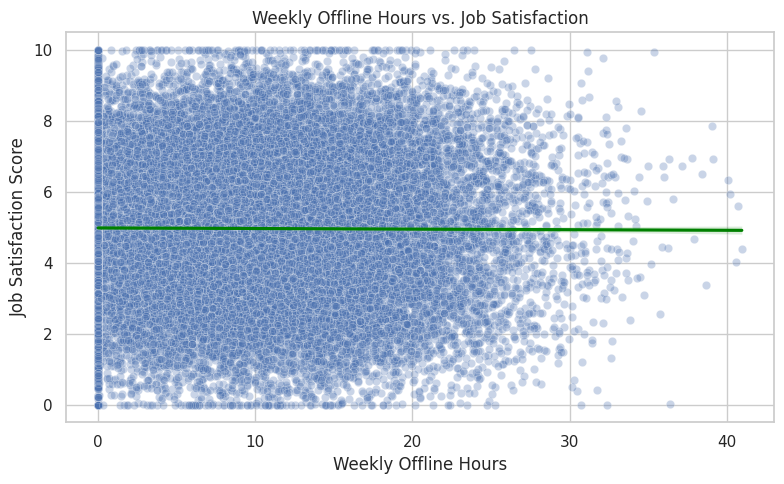

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df3, x='weekly_offline_hours', y='job_satisfaction_score', alpha=0.3)
sns.regplot(data=df3, x='weekly_offline_hours', y='job_satisfaction_score', scatter=False, color='green')
plt.title('Weekly Offline Hours vs. Job Satisfaction')
plt.xlabel('Weekly Offline Hours')
plt.ylabel('Job Satisfaction Score')
plt.tight_layout()
plt.show()

#### 성별, 연령대별 비교

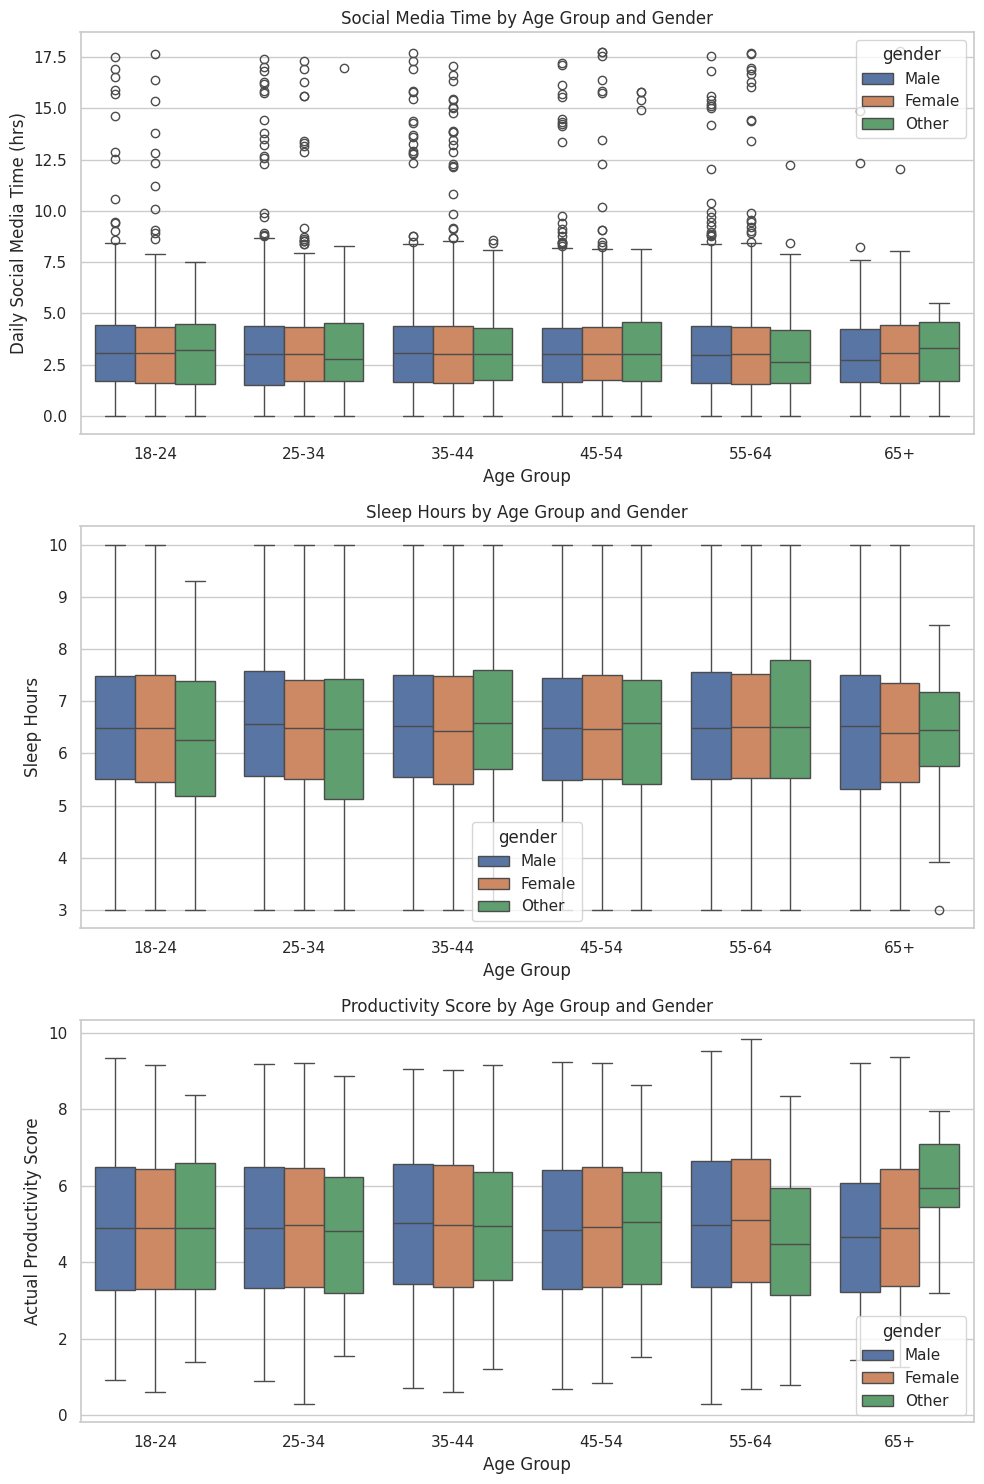

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.boxplot(data=df4, x='age_group', y='daily_social_media_time', hue='gender', ax=axes[0])
axes[0].set_title('Social Media Time by Age Group and Gender')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Daily Social Media Time (hrs)')

sns.boxplot(data=df4, x='age_group', y='sleep_hours', hue='gender', ax=axes[1])
axes[1].set_title('Sleep Hours by Age Group and Gender')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Sleep Hours')

sns.boxplot(data=df4, x='age_group', y='actual_productivity_score', hue='gender', ax=axes[2])
axes[2].set_title('Productivity Score by Age Group and Gender')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Actual Productivity Score')

plt.tight_layout()
plt.show()